# Data Science Total

Filiale du Groupe TOTAL, ARGEDIS est en charge d’un panel de 180 relais situé en France en gestion directe sur son réseau autoroutier et voies rapides, l’une des vitrines privilégiées du Groupe en France.

Au travers de ses boutiques, ARGEDIS est résolument tournée vers l’automobiliste, afin de lui faire profiter aussi bien des services marchands (produits frais, du snacking et des boissons) que des services non-marchands tels que les salons détente, etc.

La prédiction de l’approvisionnement des boutiques est un enjeu important. Être capable d’anticiper les besoins des visiteurs est critique pour un meilleur service, pour éviter les ruptures, ainsi que le gaspillage lié aux invendus.

L’objectif de ce challenge est de réaliser des prévisions de vente d'une sélection de catégories de produit (boulangerie viennoiseries pâtisseries, charcuterie, crèmerie, fruits et légumes, traiteur, baguettes, triangles, autres sandwich industriels)...

Les données à disposition sont un historique de vente depuis janvier 2016, ainsi que certaines données open data (météo, trafic routier, congés scolaires).

Deux relais typiques ont été sélectionnés pour ce challenge.

https://datascience.total.com/fr/challenge/9/details#tab_ranking

In [91]:
import pandas as pd
import numpy as np
from datetime import *
from tqdm import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [92]:
dataset = pd.read_csv('train.csv',';')
X_eval = pd.read_csv('test.csv',';')

In [93]:
dataset.head()

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672   
1         Cookie Choc Blc 70G Michel Augustin         1001672   
2        Cookie Choc Nois 70G Michel Augustin         1001672   
3            Cookie Choco 70G Michel Augustin         1001672   
4          Croissant 60G Cuit/Place Neuhauser         1001674   

  qte_article_vendue  id_categorie_5  id_categorie_4           cat6_nom  \
0               0,56         1001664         1001639  Patiss PréEmballé   
1               1,11         1001664         1001639  Patiss PréEmballé   
2               0,56         1001664         1001639  Patiss PréEmballé   
3               0,56         1001664         1001639  Patiss PréEmballé   
4               4,08         1001665         1001639   Vienn cuit/place   

       cat5_nom             cat4_nom t_9h_rouen n_9h_rouen rr3_9h_rouen  \
0    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
1    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
2    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
3    Patisserie  Boulan Vienn Patiss     278,25      100,0          0,2   
4  Viennoiserie  Boulan Vienn Patiss     278,25      100,0          0,2   

  ff_9h_rouen t_15h_rouen n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris  \
0         4,0      280,05       100,0           0,0          7,6     278,05   
1         4,0      280,05       100,0           0,0          7,6     278,05   
2         4,0      280,05       100,0           0,0          7,6     278,05   
3         4,0      280,05       100,0           0,0          7,6     278,05   
4         4,0      280,05       100,0           0,0          7,6     278,05   

  n_9h_paris rr3_9h_paris ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris  \
0      101,0          0,0         2,5      280,55       100,0           0,0   
1      101,0          0,0         2,5      280,55       100,0           0,0   
2      101,0          0,0         2,5      280,55       100,0           0,0   
3      101,0          0,0         2,5      280,55       100,0           0,0   
4      101,0          0,0         2,5      280,55       100,0           0,0   

  ff_15h_paris  aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  \
0          3,2             0             0             0             0   
1          3,2             0             0             0             0   
2          3,2             0             0             0             0   
3          3,2             0             0             0             0   
4          3,2             0             0             0             0   

   aller_zone_5  aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  \
0             0             0              0              0              0   
1             0             0              0              0              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   retour_zone_4  retour_zone_5  retour_zone_6  
0              0              0              0  
1              0              0              0  
2              0              0              0  
3              0              0              0  
4              0              0              0

### Create a dictionnary {article : [qte_article_vendue]}

In [94]:
iters ={}
means = {}
group = {}
temp = np.array(dataset[['article_nom','qte_article_vendue']])
for i in range(dataset.shape[0]):
    try:
        means[temp[i,0]] = (means[temp[i,0]]*iters[temp[i,0]]+float('.'.join(temp[i,1].split(','))))/(iters[temp[i,0]]+1)
        iters[temp[i,0]] += 1
        group[temp[i,0]].append(float('.'.join(temp[i,1].split(','))))
    except:
        iters[temp[i,0]] = 1
        means[temp[i,0]] = float('.'.join(temp[i,1].split(',')))
        group[temp[i,0]] = [float('.'.join(temp[i,1].split(',')))]

In [95]:
group

{'Cookie Cara Noix Pecan 70G Michel Augustin': [0.56,
  1.11,
  0.56,
  0.56,
  0.19,
  0.56,
  0.19,
  0.37,
  0.37,
  0.0,
  0.37,
  0.74,
  0.19,
  0.0,
  0.37,
  0.0,
  0.74,
  0.56,
  0.19,
  0.19,
  0.19,
  0.56,
  0.19,
  0.56,
  0.37,
  0.19,
  0.19,
  0.19,
  1.3,
  0.19,
  0.19,
  0.37,
  0.19,
  1.11,
  0.0,
  0.37,
  0.37,
  0.37,
  0.56,
  0.56,
  0.74,
  0.37,
  0.93,
  0.93,
  0.19,
  0.56,
  0.56,
  0.74,
  0.0,
  0.37,
  0.0,
  0.74,
  0.56,
  0.19,
  0.37,
  1.3,
  1.11,
  0.0,
  0.0,
  0.56,
  0.37,
  0.0,
  0.56,
  1.11,
  0.37,
  0.37,
  1.11,
  0.93,
  1.11,
  0.74,
  1.48,
  0.0,
  0.19,
  0.74,
  0.0,
  0.74,
  0.19,
  1.11,
  0.0,
  0.74,
  0.19,
  1.48,
  0.74,
  0.56,
  0.93,
  0.56,
  0.19,
  0.56,
  0.19,
  0.56,
  0.19,
  0.74,
  0.37,
  0.56,
  0.37,
  0.19,
  0.37,
  0.74,
  1.48,
  0.19,
  0.74,
  0.37,
  0.0,
  0.19,
  0.56,
  0.37,
  0.0,
  0.37,
  0.19,
  0.56,
  0.37,
  0.0,
  0.56,
  0.19,
  0.37,
  0.74,
  1.67,
  0.74,
  0.74,
  0.93,
  0.56,
  0

### Plot the distribution of a chosen article

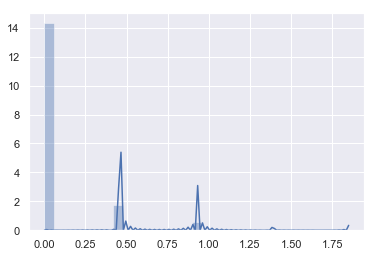

In [96]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(group['Shakissimo Latte Macchiato 190Ml Nescafe'])

### Create a dictionnary {article : {discrete_price : quantity}}

In [97]:
prices_dist = {}
for j in group:
    a=group[j]
    art = {}
    for i in range(len(a)):
        try:
            art[str(a[i])] += 1

        except:
            art[str(a[i])] = 1
    prices_dist[j] = art


In [98]:
prices_dist

{'Cookie Cara Noix Pecan 70G Michel Augustin': {'0.56': 79,
  '1.11': 19,
  '0.19': 106,
  '0.37': 108,
  '0.0': 551,
  '0.74': 50,
  '1.3': 11,
  '0.93': 32,
  '1.48': 7,
  '1.67': 5,
  '1.85': 1,
  '2.04': 1,
  '2.6': 1,
  '2.41': 1},
 'Cookie Choc Blc 70G Michel Augustin': {'1.11': 8,
  '0.0': 700,
  '0.37': 89,
  '0.19': 69,
  '0.74': 24,
  '0.56': 56,
  '1.48': 2,
  '0.93': 17,
  '2.04': 1,
  '1.3': 4,
  '1.67': 1,
  '3.15': 1},
 'Cookie Choc Nois 70G Michel Augustin': {'0.56': 67,
  '0.93': 26,
  '1.48': 3,
  '0.74': 42,
  '0.0': 548,
  '0.19': 158,
  '0.37': 103,
  '1.11': 12,
  '1.3': 10,
  '2.23': 1,
  '1.85': 1,
  '1.67': 1},
 'Cookie Choco 70G Michel Augustin': {'0.56': 100,
  '2.23': 8,
  '1.67': 25,
  '1.11': 53,
  '0.19': 169,
  '0.37': 120,
  '0.93': 80,
  '0.0': 226,
  '0.74': 68,
  '1.3': 34,
  '1.48': 35,
  '1.85': 16,
  '2.04': 11,
  '2.6': 4,
  '3.52': 2,
  '5.75': 1,
  '3.15': 4,
  '2.78': 4,
  '2.41': 5,
  '2.97': 4,
  '3.89': 1,
  '3.34': 1,
  '4.08': 1},
 'Crois

### Articles sorted by mean of qte_article_vendue

In [99]:
for i in sorted(means.items(), key=lambda kv: kv[1]):
    print(i)

('Sdw Bag Camp Rosette Cornichon 220G Daunat', 0.003641975308641974)
('Carrement Tarte Chevre Tomate 190G', 0.005751028806584363)
('Baguette Thon Basilic 235G Dm', 0.006748971193415647)
('Mangue 200G Dm', 0.014876543209876539)
('Rillettes Poulet 110G', 0.01850823045267489)
('Mousse De Canard 2X50G Madrange', 0.028744855967078212)
('Boissons Lactees 350Ml Bounty', 0.03322016460905349)
('Yaourt Myrtille 25Cl Michel Augustin', 0.04242798353909473)
('Boissons Lactees 350Ml Mms', 0.05465020576131692)
('Terrine De Campagne X2 100G Madrange', 0.05975308641975318)
('Cookie 70G Daunat', 0.06124485596707804)
('Tortellini Ricota 280G Sodebo', 0.0668827160493827)
('Saucisses Stras X4 140G Casino', 0.0735082304526751)
('Muffin 115G Daunat', 0.07363168724279806)
('Salade Fruits Tropicaux 198G Dole', 0.08019547325102884)
('Shakissimo Latte Macchiato 190Ml Nescafe', 0.09127572016460882)
('Salade Fruits Peche 198G Dole', 0.09225308641975323)
('Salade Fruits Ananas 198G Dole', 0.09782921810699612)
('Cak

('Sdw Bag Vien Thon Oeuf Crud 230G Daunat', 0.6066666666666631)
('Wrap Poulet Ceasar 205G Dm', 0.6091769547325117)
('Sdw Gourmand Poulet Caesar 190G Sodebo', 0.6108127572016501)
('Wrap Poulet Basilic 200G Dm', 0.6133744855967076)
('Justun Delice Mini 80G', 0.6185288065843633)
('Cookie Choco 70G Michel Augustin', 0.6232921810699625)
('Sdw Bag Vien Jb Salami Emm 215G Daunat', 0.6298456790123426)
('Pom Golden Unite 90G Vdumay', 0.6387551440329194)
('Yop Vanille 850G Yoplait', 0.6416666666666648)
('Ananas Mcx 200G Dm', 0.6428600823045271)
('Discoveries Seattle 22Cl Starbucks', 0.655041152263373)
('Sdw Gourmand Saumon Fume 190G Sodebo', 0.6554012345679069)
('Baton Berger Nature 75G Jb', 0.6735802469135808)
('Fol Epi 7Tr 150G', 0.6789094650205743)
('Baton Berger Mini Piment Doux 80G Jb', 0.6838683127571993)
('Sticks Chorizo 100G Auvernou', 0.6947839506172843)
('Salade De Fruits 200G Dm', 0.7194032921810698)
('Sdw Poulet Roti Mayo 160G Daunat', 0.7361625514403373)
('Sticks Roquefort 100G Auve

### Create X, y and meta

In [100]:
X = dataset.drop(columns = ['qte_article_vendue'])
y = dataset.qte_article_vendue

In [101]:
X.head()

id   implant        date  \
0  39fc404102d5  NF059473  2016-01-01   
1  aa697ce32b43  NF059473  2016-01-01   
2  291a469e1b50  NF059473  2016-01-01   
3  2dbc07dbc8f0  NF059473  2016-01-01   
4  e664714361d6  NF059473  2016-01-01   

                                  article_nom  id_categorie_6  id_categorie_5  \
0  Cookie Cara Noix Pecan 70G Michel Augustin         1001672         1001664   
1         Cookie Choc Blc 70G Michel Augustin         1001672         1001664   
2        Cookie Choc Nois 70G Michel Augustin         1001672         1001664   
3            Cookie Choco 70G Michel Augustin         1001672         1001664   
4          Croissant 60G Cuit/Place Neuhauser         1001674         1001665   

   id_categorie_4           cat6_nom      cat5_nom             cat4_nom  \
0         1001639  Patiss PréEmballé    Patisserie  Boulan Vienn Patiss   
1         1001639  Patiss PréEmballé    Patisserie  Boulan Vienn Patiss   
2         1001639  Patiss PréEmballé    Patisserie  Boulan Vienn Patiss   
3         1001639  Patiss PréEmballé    Patisserie  Boulan Vienn Patiss   
4         1001639   Vienn cuit/place  Viennoiserie  Boulan Vienn Patiss   

  t_9h_rouen n_9h_rouen rr3_9h_rouen ff_9h_rouen t_15h_rouen n_15h_rouen  \
0     278,25      100,0          0,2         4,0      280,05       100,0   
1     278,25      100,0          0,2         4,0      280,05       100,0   
2     278,25      100,0          0,2         4,0      280,05       100,0   
3     278,25      100,0          0,2         4,0      280,05       100,0   
4     278,25      100,0          0,2         4,0      280,05       100,0   

  rr3_15h_rouen ff_15h_rouen t_9h_paris n_9h_paris rr3_9h_paris ff_9h_paris  \
0           0,0          7,6     278,05      101,0          0,0         2,5   
1           0,0          7,6     278,05      101,0          0,0         2,5   
2           0,0          7,6     278,05      101,0          0,0         2,5   
3           0,0          7,6     278,05      101,0          0,0         2,5   
4           0,0          7,6     278,05      101,0          0,0         2,5   

  t_15h_paris n_15h_paris rr3_15h_paris ff_15h_paris  aller_zone_1  \
0      280,55       100,0           0,0          3,2             0   
1      280,55       100,0           0,0          3,2             0   
2      280,55       100,0           0,0          3,2             0   
3      280,55       100,0           0,0          3,2             0   
4      280,55       100,0           0,0          3,2             0   

   aller_zone_2  aller_zone_3  aller_zone_4  aller_zone_5  aller_zone_6  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   retour_zone_1  retour_zone_2  retour_zone_3  retour_zone_4  retour_zone_5  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   retour_zone_6  
0              0  
1              0  
2              0  
3              0  
4              0

In [102]:
meta=X[['id','date','article_nom']]
meta_eval=X_eval[['id','date','article_nom']]

### Encode the location

In [103]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encode_cities = LabelEncoder()
X.implant = encode_cities.fit_transform(X.implant)
print('Number of different cities :',len(encode_cities.classes_))
X_eval.implant = encode_cities.transform(X_eval.implant)

Number of different cities : 2


### Encode the articles

In [104]:
labelencoder_X_article = LabelEncoder()
X.article_nom = labelencoder_X_article.fit_transform(X.article_nom)
print('Number of different products :',len(labelencoder_X_article.classes_))
X_eval.article_nom = labelencoder_X_article.transform(X_eval.article_nom)

Number of different products : 204


In [105]:
articles = np.zeros((X.shape[0],max(X.article_nom)+1))
for i in range(X.shape[0]):
    articles[i,X.article_nom[i]] = 1
    
articles_eval = np.zeros((X_eval.shape[0],max(X.article_nom)+1))
for i in range(X_eval.shape[0]):
    articles_eval[i,X_eval.article_nom[i]] = 1

In [106]:
X = pd.concat([X,pd.DataFrame(articles)],axis = 1)
X_eval = pd.concat([X_eval,pd.DataFrame(articles_eval)],axis = 1)

X = X.drop(columns = ['article_nom'])
X_eval = X_eval.drop(columns = ['article_nom'])

In [107]:
X = X.drop(columns = ['cat6_nom','cat5_nom','cat4_nom'])
X_eval = X_eval.drop(columns = ['cat6_nom','cat5_nom','cat4_nom'])
X.head()

id  implant        date  id_categorie_6  id_categorie_5  \
0  39fc404102d5        0  2016-01-01         1001672         1001664   
1  aa697ce32b43        0  2016-01-01         1001672         1001664   
2  291a469e1b50        0  2016-01-01         1001672         1001664   
3  2dbc07dbc8f0        0  2016-01-01         1001672         1001664   
4  e664714361d6        0  2016-01-01         1001674         1001665   

   id_categorie_4 t_9h_rouen n_9h_rouen rr3_9h_rouen ff_9h_rouen t_15h_rouen  \
0         1001639     278,25      100,0          0,2         4,0      280,05   
1         1001639     278,25      100,0          0,2         4,0      280,05   
2         1001639     278,25      100,0          0,2         4,0      280,05   
3         1001639     278,25      100,0          0,2         4,0      280,05   
4         1001639     278,25      100,0          0,2         4,0      280,05   

  n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris n_9h_paris rr3_9h_paris  \
0       100,0           0,0          7,6     278,05      101,0          0,0   
1       100,0           0,0          7,6     278,05      101,0          0,0   
2       100,0           0,0          7,6     278,05      101,0          0,0   
3       100,0           0,0          7,6     278,05      101,0          0,0   
4       100,0           0,0          7,6     278,05      101,0          0,0   

  ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris ff_15h_paris  \
0         2,5      280,55       100,0           0,0          3,2   
1         2,5      280,55       100,0           0,0          3,2   
2         2,5      280,55       100,0           0,0          3,2   
3         2,5      280,55       100,0           0,0          3,2   
4         2,5      280,55       100,0           0,0          3,2   

   aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  aller_zone_5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  retour_zone_4  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   retour_zone_5  retour_zone_6    0    1    2    3    4    5    6    7    8  \
0              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0 

### Encode article categories

In [108]:
encode_cat6 = LabelEncoder()
X.id_categorie_6 = encode_cities.fit_transform(X.id_categorie_6)
X_eval.id_categorie_6 = encode_cities.transform(X_eval.id_categorie_6)

In [109]:
encode_cat5 = LabelEncoder()
X.id_categorie_5 = encode_cities.fit_transform(X.id_categorie_5)
X_eval.id_categorie_5 = encode_cities.transform(X_eval.id_categorie_5)

In [110]:
encode_cat4 = LabelEncoder()
X.id_categorie_4 = encode_cities.fit_transform(X.id_categorie_4)
X_eval.id_categorie_4 = encode_cities.transform(X_eval.id_categorie_4)

In [111]:
X.head()

id  implant        date  id_categorie_6  id_categorie_5  \
0  39fc404102d5        0  2016-01-01               1               1   
1  aa697ce32b43        0  2016-01-01               1               1   
2  291a469e1b50        0  2016-01-01               1               1   
3  2dbc07dbc8f0        0  2016-01-01               1               1   
4  e664714361d6        0  2016-01-01               2               2   

   id_categorie_4 t_9h_rouen n_9h_rouen rr3_9h_rouen ff_9h_rouen t_15h_rouen  \
0               0     278,25      100,0          0,2         4,0      280,05   
1               0     278,25      100,0          0,2         4,0      280,05   
2               0     278,25      100,0          0,2         4,0      280,05   
3               0     278,25      100,0          0,2         4,0      280,05   
4               0     278,25      100,0          0,2         4,0      280,05   

  n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris n_9h_paris rr3_9h_paris  \
0       100,0           0,0          7,6     278,05      101,0          0,0   
1       100,0           0,0          7,6     278,05      101,0          0,0   
2       100,0           0,0          7,6     278,05      101,0          0,0   
3       100,0           0,0          7,6     278,05      101,0          0,0   
4       100,0           0,0          7,6     278,05      101,0          0,0   

  ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris ff_15h_paris  \
0         2,5      280,55       100,0           0,0          3,2   
1         2,5      280,55       100,0           0,0          3,2   
2         2,5      280,55       100,0           0,0          3,2   
3         2,5      280,55       100,0           0,0          3,2   
4         2,5      280,55       100,0           0,0          3,2   

   aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  aller_zone_5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  retour_zone_4  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   retour_zone_5  retour_zone_6    0    1    2    3    4    5    6    7    8  \
0              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0 

In [112]:
cat_6 = np.zeros((X.shape[0],max(X.id_categorie_6)+1))
for i in range(X.shape[0]):
    cat_6[i,X.id_categorie_6[i]] = 1
    
cat_6_eval = np.zeros((X_eval.shape[0],max(X.id_categorie_6)+1))
for i in range(X_eval.shape[0]):
    cat_6_eval[i,X_eval.id_categorie_6[i]] = 1

In [113]:
cat_5 = np.zeros((X.shape[0],max(X.id_categorie_5)+1))
for i in range(X.shape[0]):
    cat_5[i,X.id_categorie_5[i]] = 1
    
cat_5_eval = np.zeros((X_eval.shape[0],max(X.id_categorie_5)+1))
for i in range(X_eval.shape[0]):
    cat_5_eval[i,X_eval.id_categorie_5[i]] = 1

In [114]:
cat_4 = np.zeros((X.shape[0],max(X.id_categorie_4)+1))
for i in range(X.shape[0]):
    cat_4[i,X.id_categorie_4[i]] = 1
    
cat_4_eval = np.zeros((X_eval.shape[0],max(X.id_categorie_4)+1))
for i in range(X_eval.shape[0]):
    cat_4_eval[i,X_eval.id_categorie_4[i]] = 1

In [115]:
X = pd.concat([X,pd.DataFrame(cat_6),pd.DataFrame(cat_5),pd.DataFrame(cat_4)],axis = 1)
X = X.drop(columns = ['id_categorie_4','id_categorie_5','id_categorie_6'])

X_eval = pd.concat([X_eval,pd.DataFrame(cat_6_eval),pd.DataFrame(cat_5_eval),pd.DataFrame(cat_4_eval)],axis = 1)
X_eval = X_eval.drop(columns = ['id_categorie_4','id_categorie_5','id_categorie_6'])
X.head()

id  implant        date t_9h_rouen n_9h_rouen rr3_9h_rouen  \
0  39fc404102d5        0  2016-01-01     278,25      100,0          0,2   
1  aa697ce32b43        0  2016-01-01     278,25      100,0          0,2   
2  291a469e1b50        0  2016-01-01     278,25      100,0          0,2   
3  2dbc07dbc8f0        0  2016-01-01     278,25      100,0          0,2   
4  e664714361d6        0  2016-01-01     278,25      100,0          0,2   

  ff_9h_rouen t_15h_rouen n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris  \
0         4,0      280,05       100,0           0,0          7,6     278,05   
1         4,0      280,05       100,0           0,0          7,6     278,05   
2         4,0      280,05       100,0           0,0          7,6     278,05   
3         4,0      280,05       100,0           0,0          7,6     278,05   
4         4,0      280,05       100,0           0,0          7,6     278,05   

  n_9h_paris rr3_9h_paris ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris  \
0      101,0          0,0         2,5      280,55       100,0           0,0   
1      101,0          0,0         2,5      280,55       100,0           0,0   
2      101,0          0,0         2,5      280,55       100,0           0,0   
3      101,0          0,0         2,5      280,55       100,0           0,0   
4      101,0          0,0         2,5      280,55       100,0           0,0   

  ff_15h_paris  aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  \
0          3,2             0             0             0             0   
1          3,2             0             0             0             0   
2          3,2             0             0             0             0   
3          3,2             0             0             0             0   
4          3,2             0             0             0             0   

   aller_zone_5  aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  \
0             0             0              0              0              0   
1             0             0              0              0              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   retour_zone_4  retour_zone_5  retour_zone_6    0    1    2    3    4    5  \
0              0              0              0  0.0  0.0  0.0  0.0  0.0  0.0   
1              0              0              0  0.0  0.0  0.0  0.0  0.0  0.0   
2              0              0              0  0.0  0.0  0.0  0.0  0.0  0.0   
3              0              0              0  0.0  0.0  0.0  0.0  0.0  0.0   
4              0              0              0  0.0  0.0  0.0  0.0  0.0  0.0   

     6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    21   22   23   24   25   26   27   28   29   30   31   32   33   34   35  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    36   37   38   39   40   41   42   43   44   45   46   47   48   49   50  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.

# Encode day of the week and weekend

In [116]:
dayofweek = []
weekend = []
for date in X.date:
    day = datetime.strptime(date, "%Y-%m-%d").weekday()
    dayofweek.append(day)
    if day >= 5:
        weekend.append(1)
    else:
        weekend.append(0)
encoded_dayofweek = np.zeros((X.shape[0],7))
for i in range(X.shape[0]):
    encoded_dayofweek[i,dayofweek[i]] = 1

In [117]:
dayofweek_eval = []
weekend_eval = []
for date in X_eval.date:
    day = datetime.strptime(date, "%Y-%m-%d").weekday()
    dayofweek_eval.append(day)
    if day >= 5:
        weekend_eval.append(1)
    else:
        weekend_eval.append(0)
encoded_dayofweek_eval = np.zeros((X_eval.shape[0],7))
for i in range(X_eval.shape[0]):
    encoded_dayofweek_eval[i,dayofweek_eval[i]] = 1

In [118]:
X = pd.concat([X,pd.DataFrame(encoded_dayofweek,columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),pd.DataFrame(weekend,columns=['weekend'])],axis = 1)
X_eval = pd.concat([X_eval,pd.DataFrame(encoded_dayofweek_eval,columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),pd.DataFrame(weekend_eval,columns=['weekend'])],axis = 1)

In [119]:
X = X.drop(columns = ['id','date'])
X_eval = X_eval.drop(columns = ['id','date'])

In [120]:
X.head()

implant t_9h_rouen n_9h_rouen rr3_9h_rouen ff_9h_rouen t_15h_rouen  \
0        0     278,25      100,0          0,2         4,0      280,05   
1        0     278,25      100,0          0,2         4,0      280,05   
2        0     278,25      100,0          0,2         4,0      280,05   
3        0     278,25      100,0          0,2         4,0      280,05   
4        0     278,25      100,0          0,2         4,0      280,05   

  n_15h_rouen rr3_15h_rouen ff_15h_rouen t_9h_paris n_9h_paris rr3_9h_paris  \
0       100,0           0,0          7,6     278,05      101,0          0,0   
1       100,0           0,0          7,6     278,05      101,0          0,0   
2       100,0           0,0          7,6     278,05      101,0          0,0   
3       100,0           0,0          7,6     278,05      101,0          0,0   
4       100,0           0,0          7,6     278,05      101,0          0,0   

  ff_9h_paris t_15h_paris n_15h_paris rr3_15h_paris ff_15h_paris  \
0         2,5      280,55       100,0           0,0          3,2   
1         2,5      280,55       100,0           0,0          3,2   
2         2,5      280,55       100,0           0,0          3,2   
3         2,5      280,55       100,0           0,0          3,2   
4         2,5      280,55       100,0           0,0          3,2   

   aller_zone_1  aller_zone_2  aller_zone_3  aller_zone_4  aller_zone_5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   aller_zone_6  retour_zone_1  retour_zone_2  retour_zone_3  retour_zone_4  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   retour_zone_5  retour_zone_6    0    1    2    3    4    5    6    7    8  \
0              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              0              0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [121]:
meta.head()

id        date                                 article_nom
0  39fc404102d5  2016-01-01  Cookie Cara Noix Pecan 70G Michel Augustin
1  aa697ce32b43  2016-01-01         Cookie Choc Blc 70G Michel Augustin
2  291a469e1b50  2016-01-01        Cookie Choc Nois 70G Michel Augustin
3  2dbc07dbc8f0  2016-01-01            Cookie Choco 70G Michel Augustin
4  e664714361d6  2016-01-01          Croissant 60G Cuit/Place Neuhauser

# Exchange weather

In [122]:
# info = []
# implants = np.array(X.implant)
# temp = np.array(X[['t_9h_rouen','n_9h_rouen','rr3_9h_rouen','ff_9h_rouen','t_15h_rouen','n_15h_rouen','rr3_15h_rouen','ff_15h_rouen','t_9h_paris','n_9h_paris','rr3_9h_paris','ff_9h_paris','t_15h_paris','n_15h_paris','rr3_15h_paris','ff_15h_paris']])
# for i in tnrange(X.shape[0]):
#     a = temp[i,:8]
#     b = temp[i,8:]
#     if implants[i] == 0:
#         info.append(np.concatenate((np.array(a),np.array(b))))
#     else:
#         info.append(np.concatenate((np.array(b),np.array(a))))

In [123]:
# info_eval = []
# implants_eval = np.array(X_eval.implant)
# temp_eval = np.array(X_eval[['t_9h_rouen','n_9h_rouen','rr3_9h_rouen','ff_9h_rouen','t_15h_rouen','n_15h_rouen','rr3_15h_rouen','ff_15h_rouen','t_9h_paris','n_9h_paris','rr3_9h_paris','ff_9h_paris','t_15h_paris','n_15h_paris','rr3_15h_paris','ff_15h_paris']])
# for i in tnrange(X_eval.shape[0]):
#     a = temp_eval[i,:8]
#     b = temp_eval[i,8:]
#     if implants_eval[i] == 0:
#         info_eval.append(np.concatenate((np.array(a),np.array(b))))
#     else:
#         info_eval.append(np.concatenate((np.array(b),np.array(a))))

In [124]:
# X.head()

In [125]:
# X.shape[0] == y.shape[0]

In [126]:
# X = pd.concat([X,pd.DataFrame(info)],axis=1)
# X_eval = pd.concat([X_eval,pd.DataFrame(info_eval)],axis=1)

In [127]:
# X = X.drop(columns = ['t_9h_rouen','n_9h_rouen','rr3_9h_rouen','ff_9h_rouen','t_15h_rouen','n_15h_rouen','rr3_15h_rouen','ff_15h_rouen','t_9h_paris','n_9h_paris','rr3_9h_paris','ff_9h_paris','t_15h_paris','n_15h_paris','rr3_15h_paris','ff_15h_paris'])
# X_eval = X_eval.drop(columns = ['t_9h_rouen','n_9h_rouen','rr3_9h_rouen','ff_9h_rouen','t_15h_rouen','n_15h_rouen','rr3_15h_rouen','ff_15h_rouen','t_9h_paris','n_9h_paris','rr3_9h_paris','ff_9h_paris','t_15h_paris','n_15h_paris','rr3_15h_paris','ff_15h_paris'])

In [128]:
# X.head()

### Prediction Bison Futé from continuous to dummies

Rouen belongs to the zone 2 : https://www.bison-fute.gouv.fr/IMG/pdf/17237_Calendrier_Bison-Fute_2018_Web.pdf

In [129]:
# aller = np.zeros((X.shape[0],4))
# retour = np.zeros((X.shape[0],4))
# allers = X.aller_zone_2.values
# retours = X.retour_zone_2.values
# for i in range(X.shape[0]):
#     aller[i,allers[i]] = 1
#     retour[i,retours[i]] = 1

In [130]:
# X =pd.concat([X.drop(columns = ['aller_zone_2','retour_zone_2']),pd.DataFrame(aller),pd.DataFrame(retour),X.aller_zone_2+X.retour_zone_2],axis = 1)

In [131]:
# aller = np.zeros((X_eval.shape[0],4))
# retour = np.zeros((X_eval.shape[0],4))
# allers = X_eval.aller_zone_2.values
# retours = X_eval.retour_zone_2.values
# for i in range(X_eval.shape[0]):
#     aller[i,allers[i]] = 1
#     retour[i,retours[i]] = 1

In [132]:
# X_eval =pd.concat([X_eval.drop(columns = ['aller_zone_2','retour_zone_2']),pd.DataFrame(aller),pd.DataFrame(retour),X_eval.aller_zone_2+X_eval.retour_zone_2],axis = 1)

# Replace , by .

In [133]:
columns = X.columns
X = np.array(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        try:
            X[i,j] = float('.'.join(X[i,j].split(',')))
        except:
            pass

X_eval = np.array(X_eval)
for i in range(X_eval.shape[0]):
    for j in range(X_eval.shape[1]):
        try:
            X_eval[i,j] = float('.'.join(X_eval[i,j].split(',')))
        except:
            pass

In [134]:
y = np.array(y)
for i in range(y.shape[0]):
    try:
        y[i] = float('.'.join(y[i].split(',')))
    except:
        pass

In [135]:
corrmat = X.iloc[:,-8:].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [136]:
# X = pd.DataFrame(X,columns=columns)
corrmat = pd.concat([X.iloc[:,1:list(X.columns).index('retour_zone_6')+1], X.iloc[:,-8:]],axis=1).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
 pd.concat([X.iloc[:,1:list(X.columns).index('retour_zone_6')+1], X.iloc[:,-8:]],axis=1).head()

In [ ]:
corrmat

In [ ]:
np.corrcoef(X[['t_9h_rouen','t_9h_paris']].values.transpose())

In [ ]:
np.corrcoef(np.array([[1,2],[3,4],[5,6]]))

# Standard Normal Distribution

In [137]:
std = {}
for i in group:
    std[i] = np.std(group[i])

In [138]:
for i in range(len(y)):
    article = meta.article_nom[i]
    y[i] = (float(y[i])-means[article])/std[article]

In [139]:
list(y)

[0.8612134763947561,
 3.4016716320480307,
 1.1377284839136075,
 -0.0925161512351343,
 2.336344478476927,
 2.807048253831608,
 -0.38433300218204425,
 0.6214316382697572,
 1.9739432509074755,
 1.1047803450887312,
 3.309626025433666,
 0.15142357350946206,
 0.26409745222336384,
 5.2106694792973665,
 0.8096591018562777,
 2.142139825905925,
 2.2695792899917935,
 -0.2959841502827687,
 0.5474282339611021,
 0.21995069823830585,
 0.5602919082180547,
 3.10726939487179,
 1.3303099382034327,
 2.276498063606957,
 -0.09260599185874108,
 1.5870166760029905,
 1.3567682471792963,
 1.892307013713891,
 1.177400348334306,
 2.702798092474613,
 0.12814161230254234,
 1.3848783633089572,
 7.736923571475137,
 -0.3403193532775378,
 2.574956577634574,
 1.0506659095920972,
 0.6219341010174035,
 0.4157875634724313,
 0.9603402170118023,
 0.2529976890500197,
 0.8877496024983608,
 0.3372209193661734,
 0.8961411540236756,
 0.7062501058219823,
 -0.15113048113470984,
 1.0765603329930018,
 2.474223008260519,
 0.9309266391

In [140]:
list(np.power(10,np.log10(np.array(list(y+4))))-4)

[0.8612134763947559,
 3.401671632048031,
 1.1377284839136061,
 -0.09251615123513446,
 2.336344478476927,
 2.807048253831608,
 -0.3843330021820437,
 0.6214316382697573,
 1.9739432509074755,
 1.1047803450887308,
 3.3096260254336656,
 0.15142357350946245,
 0.2640974522233632,
 5.210669479297366,
 0.809659101856278,
 2.142139825905925,
 2.2695792899917935,
 -0.2959841502827687,
 0.547428233961103,
 0.21995069823830615,
 0.5602919082180549,
 3.107269394871791,
 1.3303099382034338,
 2.276498063606957,
 -0.09260599185874119,
 1.5870166760029898,
 1.3567682471792955,
 1.892307013713891,
 1.1774003483343067,
 2.7027980924746124,
 0.12814161230254228,
 1.3848783633089559,
 7.736923571475138,
 -0.34031935327753793,
 2.574956577634574,
 1.050665909592098,
 0.6219341010174038,
 0.4157875634724313,
 0.9603402170118027,
 0.2529976890500194,
 0.8877496024983609,
 0.3372209193661737,
 0.8961411540236757,
 0.7062501058219821,
 -0.15113048113470962,
 1.0765603329930018,
 2.4742230082605197,
 0.9309266391

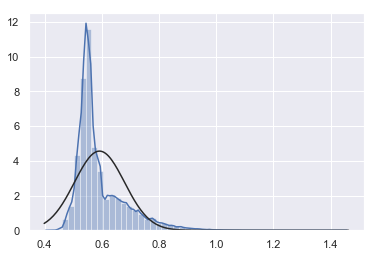

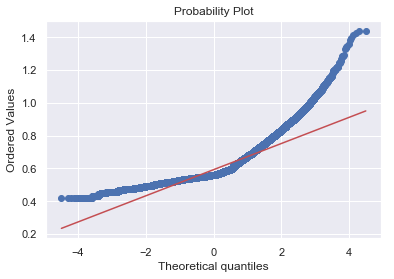

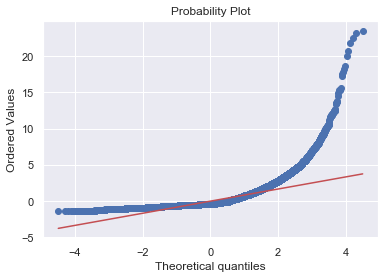

In [147]:
from scipy.stats import norm
from scipy import stats
sns.distplot(list(np.log10(np.array(list(y))+4)), fit=norm);


fig = plt.figure()
res = stats.probplot(list(np.log10(np.array(list(y))+4)), plot=plt)
fig = plt.figure()
res = stats.probplot(list(y), plot=plt)

In [148]:
y = np.log10(np.array(list(y))+4)

# Creation fo the models

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, max_features='auto', min_samples_split=2, n_estimators=30,verbose = 2,n_jobs = 5)

C:\Users\avillemin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, n_estimators=1000,verbose = 2,n_jobs = 5)

In [ ]:
# i = int(X.shape[0]*2/5)
# X = X[i:,:]
# y = y[i:]

In [ ]:
regressor.fit(X, y)

building tree 1 of 30building tree 2 of 30building tree 3 of 30
building tree 4 of 30building tree 5 of 30



building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


In [ ]:
y_pred = regressor.predict(X_eval)

In [ ]:
y_pred = np.power(10,y_pred)-4

In [ ]:
y_pred

# Reverse standard normal distribution

In [ ]:
for i in range(len(y_pred)):
    article = meta_eval.article_nom[i]
    y_pred[i] = y_pred[i]*std[article]+means[article]

# From continuous to discrete

In [ ]:
for i in range(len(y_pred)):
    dictio = prices_dist[meta_eval.article_nom[i]]
    mini = 1000
    min_dist = 1000
    for j in dictio:
        if abs(y_pred[i]-float(j))<min_dist:
            min_dist = abs(y_pred[i]-float(j))
            mini = j
    y_pred[i] = float(mini)

In [ ]:
y_pred

# Write the final csv file

In [ ]:
y_pred_final = []
for i in range(len(y_pred)):
    y_pred_final.append(','.join(str(y_pred[i]).split('.')))

In [ ]:
y_final = pd.concat([meta_eval.id,pd.DataFrame(y_pred_final,columns=['quantite_vendue'])],axis=1)

In [ ]:
y_final.head()

In [ ]:
y_final.to_csv('pred.csv',';',index=False)

# Grid Search

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_jobs = -1)

In [ ]:
param_grid = {'max_depth': [20,50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20]}

In [ ]:
param_grid = { 
            "n_estimators"      : [400],
            'booster' : ['gbtree','gblinear','dart']
            }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = param_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = 3,
                           verbose = 3)
grid_search = grid_search.fit(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# x=pd.DataFrame(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X = pca.fit_transform(X)